# Line Plot Demo


In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

## Create some fake data

*I'm using numpy to create a bunch of random curves.  Let's imagine that these are spectra or seimological data.  Each curve has a similar format, but there were taken at different times. We want to show all the data to compare each together.*

In [2]:
nval = 500
x = np.linspace(0, nval-1, nval)

In [3]:
def gauss(x,s,m,a):
    return a*np.exp(-0.5*((x - m)/s)**2.)

nline = 10
y = np.empty((nline, nval))
for i in range(nline):
    #add some random noise
    y[i,:] = np.random.random(size=nval) - 0.5
    
for i in range(nline):
    #add a few random Gaussians
    for foo in range(10):
        mean = np.random.random()*nval
        stdev = np.random.random() + 2
        amp = -10*np.random.random()
        y[i,:] +=  gauss(x,stdev,mean,amp)

#define the times
times = np.linspace(1, nline-1, nline) +  np.random.random(size=nline)-0.5

print(times)

[0.95757426 1.54721742 2.80014658 3.63613099 4.99537878 5.80282526
 5.88860187 6.72646916 8.16499814 9.11460112]


## Let's plot these in one plot

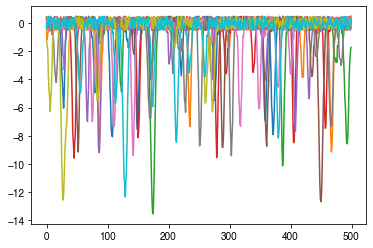

In [6]:
#define the subplots and figure size
f, ax = plt.subplots()

for i in range(nline):
    ax.plot(x,y[i,:])



##### How can we make this better
* Right now it is a jumble of lines.  We want to separate them out somehow.  
* We also want to label the lines, but it will be combersome to have so many items in a legend
* We want to choose our own colors
* We want to be sure to label the axes

*One option could be to spread the lines out using a default offset, and perhaps to color code them using a sequential colormap.  This might work, for instance, if these measurements were taken in resonalby consistent intervals of time (e.g., a spectrum taken every few seconds)*

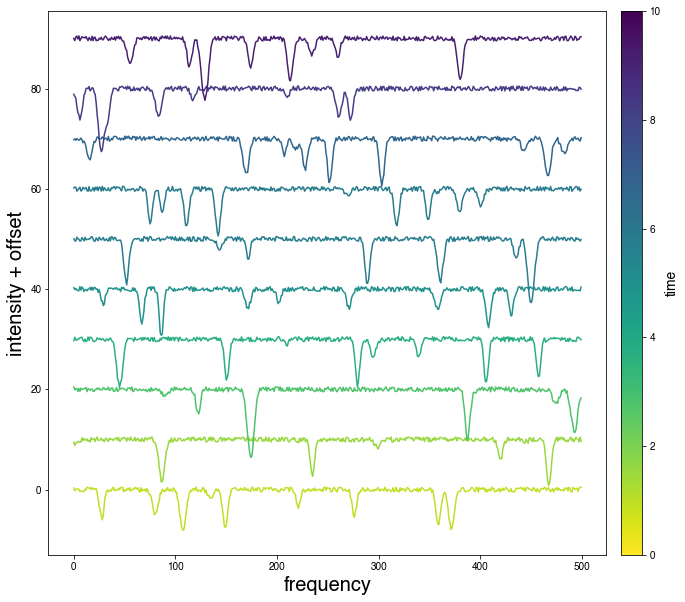

In [7]:
f, ax = plt.subplots(figsize=(10, 10))

#define some offset
offset = 10.

#choose some colormap
cmap = matplotlib.cm.get_cmap('viridis_r')


for i in range(nline):
    ax.plot(x,y[i,:] + offset*i, c=cmap(times[i]/nline))

#add the colorbar on right side of the plot
cax = f.add_axes([0.92, 0.125, 0.03, 0.755])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=nline))
f.colorbar(sm, cax=cax, orientation='vertical')
cax.set_ylabel('time', fontsize=14)

ax.set_xlabel('frequency', fontsize=20)
ax.set_ylabel('intensity + offset', fontsize=20)

f.savefig('line1.pdf',format='pdf', bbox_inches = 'tight') 


## Now let's imagine that one of these lines is different from the others

*How can we highlight and identify it visually?*

In [8]:
#let's make one line a little different
jdiff = 3
for foo in range(10):
    mean = np.random.random()*nval
    stdev = np.random.random()*4 + 6
    amp = -5*np.random.random()
    y[jdiff,:] += gauss(x,stdev,mean,amp)

*For this plot, let's note the times in text, and identify the line of interest with color.  Using text to identify the lines, instead of a colormap, would also help if the differences in times were wildly different (e.g., if some taken with seconds of each other while others were taken years apart).*

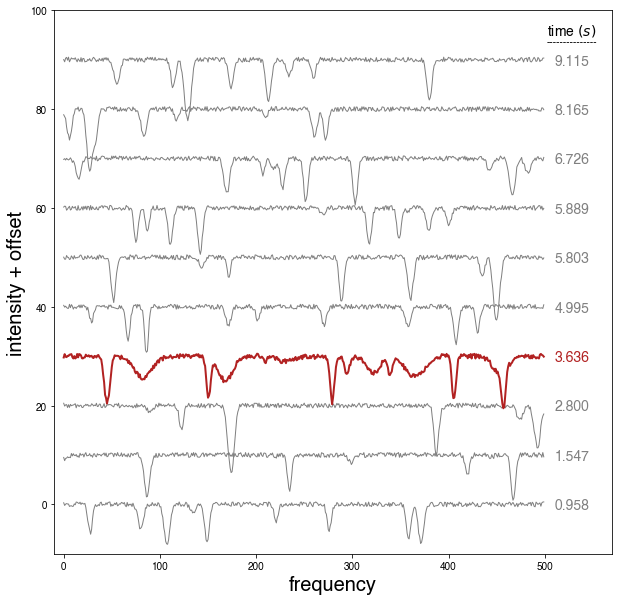

In [9]:
f, ax = plt.subplots(figsize=(10, 10))

#define some offset
offset = 10.

for i in range(nline):
    c = 'gray'
    w = 1
    if (i == jdiff):
        c = 'firebrick'
        w = 2
    ax.plot(x,y[i,:] + offset*i, c=c, linewidth=w)
    ax.text(nval+10, offset*i-1, "{:5.3f}".format(times[i]), fontsize=14,c=c)
    
ax.set_xlabel('frequency', fontsize=20)
ax.set_ylabel('intensity + offset', fontsize=20)
ax.text(nval+2, offset*nline-5, r'time $(s)$', fontsize=14)
ax.text(nval+2, offset*nline-7, '---------------')
ax.set_xlim(-10,570)
ax.set_ylim(-10,100)



f.savefig('line2.pdf',format='pdf', bbox_inches = 'tight') 
